<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Очистка-данных" data-toc-modified-id="Очистка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Очистка данных</a></span></li><li><span><a href="#Обработка-категориальных-переменных" data-toc-modified-id="Обработка-категориальных-переменных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обработка категориальных переменных</a></span></li><li><span><a href="#Генерация-новых-признаков-(feature-engineering)" data-toc-modified-id="Генерация-новых-признаков-(feature-engineering)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Генерация новых признаков (feature engineering)</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

C:\Users\koren\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
file_path = "synthetic_dataset.xlsx"
df = pd.read_excel(file_path)

## Первичный анализ данных

In [3]:
df.head()

,ID,Name,Age,Salary,City,Purchase_Amount,Total_Purchases,Days_Since_Last_Purchase,Signup_Date,Participated_In_Promo
0,1,Grace,54.0,110955.0,New York,455.0,1,185,2020-07-01,0
1,2,David,35.0,35433.0,London,NaN,8,217,2020-07-10,1
2,3,Hannah,45.0,88011.0,Berlin,158.0,4,315,2020-03-05,0
3,4,Eve,30.0,106688.0,Berlin,125.0,9,216,2022-08-20,0
4,5,Grace,NaN,82468.0,New York,NaN,5,119,2022-05-13,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        525 non-null    int64         
 1   Name                      525 non-null    object        
 2   Age                       476 non-null    float64       
 3   Salary                    473 non-null    float64       
 4   City                      472 non-null    object        
 5   Purchase_Amount           471 non-null    float64       
 6   Total_Purchases           525 non-null    int64         
 7   Days_Since_Last_Purchase  525 non-null    int64         
 8   Signup_Date               525 non-null    datetime64[ns]
 9   Participated_In_Promo     525 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 41.1+ KB


In [5]:
df.describe()

,ID,Age,Salary,Purchase_Amount,Total_Purchases,Days_Since_Last_Purchase,Participated_In_Promo
count,525.000000,476.000000,4.730000e+02,471.000000,525.000000,525.000000,525.000000
mean,251.712381,34.485294,1.036895e+05,280.267516,5.171429,178.022857,0.220952
std,145.376240,16.202722,1.558680e+05,130.003898,2.829969,107.345235,0.415284
min,1.000000,5.000000,5.000000e+03,50.000000,1.000000,0.000000,0.000000
25%,125.000000,24.000000,6.286400e+04,166.500000,3.000000,89.000000,0.000000
50%,253.000000,34.000000,8.451200e+04,274.000000,5.000000,174.000000,0.000000
75%,378.000000,44.000000,1.031500e+05,403.000000,8.000000,271.000000,0.000000
max,500.000000,110.000000,1.200000e+06,497.000000,10.000000,364.000000,1.000000


In [6]:
print(df.isnull().sum())

ID                           0
Name                         0
Age                         49
Salary                      52
City                        53
Purchase_Amount             54
Total_Purchases              0
Days_Since_Last_Purchase     0
Signup_Date                  0
Participated_In_Promo        0
dtype: int64


In [7]:
df['City'].value_counts()

London      129
New York    122
Berlin      112
Paris       109
Name: City, dtype: int64

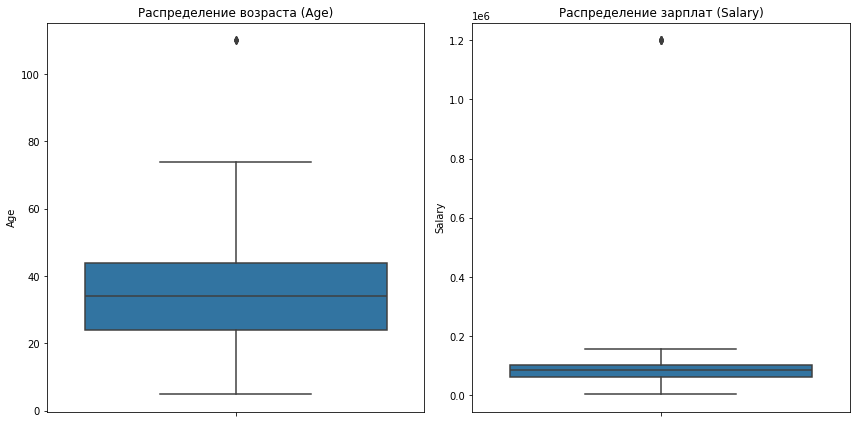

In [8]:
# Визуализация: boxplot для выявления выбросов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Распределение возраста (Age)")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary'])
plt.title("Распределение зарплат (Salary)")

plt.tight_layout()
plt.show()

C:\Users\koren\AppData\Local\Temp\ipykernel_17228\1049763050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


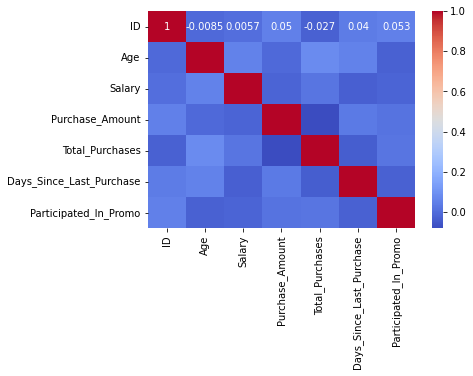

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

<Axes: >

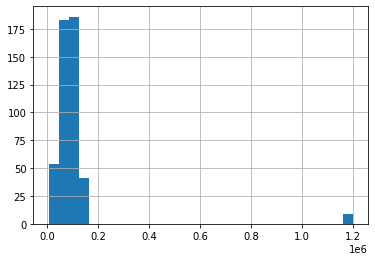

In [10]:
df['Salary'].hist(bins=30)

In [11]:
df['Participated_In_Promo'].value_counts(normalize=True)

0    0.779048
1    0.220952
Name: Participated_In_Promo, dtype: float64

## Очистка данных

In [12]:
# Заполняем числовые пропуски медианой (устойчиво к выбросам)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Заполняем категориальные пропуски модой (наиболее частая категория)
df['City'].fillna(df['City'].mode()[0], inplace=True)

# Заполняем пропуски в сумме покупок средним значением
df['Purchase_Amount'].fillna(df['Purchase_Amount'].mean(), inplace=True)

In [13]:
# Если переменная разная для разных категорий, можно заполнять средним внутри каждой категории

df['Salary'] = df.groupby('City')['Salary'].transform(lambda x: x.fillna(x.mean()))

In [14]:
# Функция для удаления выбросов по IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применяем обработку выбросов
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Salary')

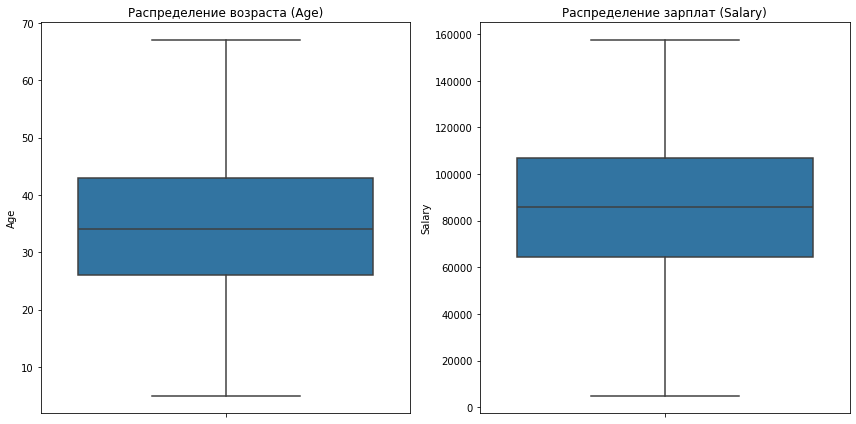

In [15]:
# Визуализация: boxplot после удаления выбросов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Распределение возраста (Age)")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary'])
plt.title("Распределение зарплат (Salary)")

plt.tight_layout()
plt.show()

In [16]:
# Удаляем полные дубликаты
df = df.drop_duplicates()

## Обработка категориальных переменных

In [17]:
## Нужно выбрать один из способов

In [18]:
# 1. Label Encoding (для деревьев решений)
le = LabelEncoder()
df['City_Label'] = le.fit_transform(df['City'])

In [19]:
df.head()

,ID,Name,Age,Salary,City,Purchase_Amount,Total_Purchases,Days_Since_Last_Purchase,Signup_Date,Participated_In_Promo,City_Label
0,1,Grace,54.0,110955.0,New York,455.000000,1,185,2020-07-01,0,2
1,2,David,35.0,35433.0,London,280.267516,8,217,2020-07-10,1,1
2,3,Hannah,45.0,88011.0,Berlin,158.000000,4,315,2020-03-05,0,0
3,4,Eve,30.0,106688.0,Berlin,125.000000,9,216,2022-08-20,0,0
4,5,Grace,34.0,82468.0,New York,280.267516,5,119,2022-05-13,0,2


In [20]:
# 2. One-Hot Encoding (для линейных моделей) - удаляет исходный столбец
df['City_initial'] = df['City']
df = pd.get_dummies(df, columns=['City_initial'])

In [21]:
df.head()

,ID,Name,Age,Salary,City,Purchase_Amount,Total_Purchases,Days_Since_Last_Purchase,Signup_Date,Participated_In_Promo,City_Label,City_initial_Berlin,City_initial_London,City_initial_New York,City_initial_Paris
0,1,Grace,54.0,110955.0,New York,455.000000,1,185,2020-07-01,0,2,0,0,1,0
1,2,David,35.0,35433.0,London,280.267516,8,217,2020-07-10,1,1,0,1,0,0
2,3,Hannah,45.0,88011.0,Berlin,158.000000,4,315,2020-03-05,0,0,1,0,0,0
3,4,Eve,30.0,106688.0,Berlin,125.000000,9,216,2022-08-20,0,0,1,0,0,0
4,5,Grace,34.0,82468.0,New York,280.267516,5,119,2022-05-13,0,2,0,0,1,0


In [23]:
# 3. Frequency Encoding (для больших категорий)
df['City_Frequency'] = df.groupby('City')['City'].transform('count') / len(df)

In [24]:
df.head()

,ID,Name,Age,Salary,City,Purchase_Amount,Total_Purchases,Days_Since_Last_Purchase,Signup_Date,Participated_In_Promo,City_Label,City_initial_Berlin,City_initial_London,City_initial_New York,City_initial_Paris,City_Frequency
0,1,Grace,54.0,110955.0,New York,455.000000,1,185,2020-07-01,0,2,0,0,1,0,0.229675
1,2,David,35.0,35433.0,London,280.267516,8,217,2020-07-10,1,1,0,1,0,0,0.343496
2,3,Hannah,45.0,88011.0,Berlin,158.000000,4,315,2020-03-05,0,0,1,0,0,0,0.215447
3,4,Eve,30.0,106688.0,Berlin,125.000000,9,216,2022-08-20,0,0,1,0,0,0,0.215447
4,5,Grace,34.0,82468.0,New York,280.267516,5,119,2022-05-13,0,2,0,0,1,0,0.229675


In [26]:
# 4. Target Encoding (возможна утечка!)
df['City_Target_Enc'] = df.groupby('City')['Participated_In_Promo'].transform('mean')

In [27]:
df.head()

,ID,Name,Age,Salary,City,Purchase_Amount,Total_Purchases,Days_Since_Last_Purchase,Signup_Date,Participated_In_Promo,City_Label,City_initial_Berlin,City_initial_London,City_initial_New York,City_initial_Paris,City_Frequency,City_Target_Enc
0,1,Grace,54.0,110955.0,New York,455.000000,1,185,2020-07-01,0,2,0,0,1,0,0.229675,0.185841
1,2,David,35.0,35433.0,London,280.267516,8,217,2020-07-10,1,1,0,1,0,0,0.343496,0.254438
2,3,Hannah,45.0,88011.0,Berlin,158.000000,4,315,2020-03-05,0,0,1,0,0,0,0.215447,0.216981
3,4,Eve,30.0,106688.0,Berlin,125.000000,9,216,2022-08-20,0,0,1,0,0,0,0.215447,0.216981
4,5,Grace,34.0,82468.0,New York,280.267516,5,119,2022-05-13,0,2,0,0,1,0,0.229675,0.185841


## Генерация новых признаков (feature engineering)

In [37]:
## Извлечение информации из дат
df['Signup_Year'] = df['Signup_Date'].dt.year
df['Signup_Month'] = df['Signup_Date'].dt.month
df['Signup_Weekday'] = df['Signup_Date'].dt.weekday  # День недели (0 - Пн, 6 - Вс)
df['Signup_Weekend'] = (df['Signup_Weekday'] >= 5).astype(int)  # Флаг выходного дня

In [38]:
## Биннинг числовых признаков (группировка по диапазонам)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle_Aged', 'Senior'])
df['Salary_Group'] = pd.qcut(df['Salary'], q=4, labels=['Low', 'Medium', 'High', 'Very_High'])

In [39]:
## Создание взаимодействий между признаками
df['Purchase_Frequency'] = df['Total_Purchases'] / (df['Days_Since_Last_Purchase'] + 1)  # Частота покупок
df['Salary_to_Age'] = df['Salary'] / df['Age']  # Отношение зарплаты к возрасту
df['Spending_Score'] = df['Purchase_Amount'] / df['Salary']  # Какую часть зарплаты тратит пользователь

In [40]:
## Логические признаки
df['High_Income'] = (df['Salary'] > df['Salary'].median()).astype(int)  # Флаг высокой зарплаты
df['Loyal_Customer'] = (df['Total_Purchases'] > df['Total_Purchases'].median()).astype(int)  # Лояльный покупатель

In [41]:
df.head()

,ID,Name,Age,Salary,City,Purchase_Amount,Total_Purchases,Days_Since_Last_Purchase,Signup_Date,Participated_In_Promo,...,Signup_Month,Signup_Weekday,Signup_Weekend,Age_Group,Salary_Group,Purchase_Frequency,Salary_to_Age,Spending_Score,High_Income,Loyal_Customer
0,1,Grace,54.0,110955.0,New York,455.000000,1,185,2020-07-01,0,...,7,2,0,Middle_Aged,Very_High,0.005376,2054.722222,0.004101,1,0
1,2,David,35.0,35433.0,London,280.267516,8,217,2020-07-10,1,...,7,4,0,Adult,Low,0.036697,1012.371429,0.007910,0,1
2,3,Hannah,45.0,88011.0,Berlin,158.000000,4,315,2020-03-05,0,...,3,3,0,Adult,High,0.012658,1955.800000,0.001795,1,0
3,4,Eve,30.0,106688.0,Berlin,125.000000,9,216,2022-08-20,0,...,8,5,1,Adult,High,0.041475,3556.266667,0.001172,1,1
4,5,Grace,34.0,82468.0,New York,280.267516,5,119,2022-05-13,0,...,5,4,0,Adult,Medium,0.041667,2425.529412,0.003399,0,0


В итоге должен получиться датасет, который уже можно будет подавать для моделей машинного обучения - все нечисловые признаки при этом должны быть переведны в числовые, лишние переменные удалены, а все остальные - правильно предобработаны!